# CalciumAnalyzer guide

This notebook shows how to use the CalciumAnalyzer

In [1]:
from CalciumAnalyzer import CalciumAnalyzer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The simulated calcium transients by Tomek et al. 2019 model with the added noise are used as an example

In [2]:
data = np.loadtxt("Example_transients.txt")
T, Ca = data[:,0], data[:,1]

You can check the quality of the signal detection after initialization of CalciumAnalyzer. Individual transients are color-coded and the onset times are displayed. We have also set the calcium quantile equals to 10% so that the rise and decay time are calculated as 10-90% times of the corresponding phases. There are 100 transients so the total number of transients is detected correctly.

There are 100 transients


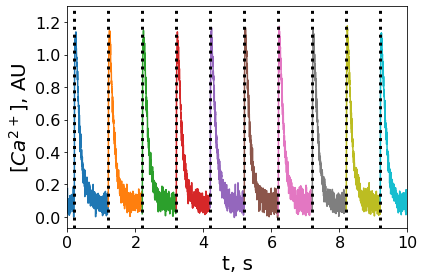

In [3]:
analyzer = CalciumAnalyzer(T,Ca,ca_quantile = 0.1)
t,ca, _ = analyzer.GetAllExpTransients()
for i in range(len(t)):
    plt.plot(t[i] * 1e-3,ca[i])
for t_null in analyzer.t0s_est:
    plt.axvline(t_null * 1e-3,linestyle="dotted", linewidth = 3, color = 'black')
print("There are",len(analyzer.t0s_est),"transients")
plt.rcParams["font.family"] = "Arial"    
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlim(0,10)
plt.xlabel('t, s', fontsize = 20) 
plt.ylabel('$\mathit{[Ca^{2+}]}$, AU', fontsize = 20)
plt.tight_layout()
plt.show()

After the detection of all transients, approximate transients and get table with the parameters

In [ ]:
analyzer.FitAllTransients(disp=True)
table = analyzer.GetParametersTable()

Save parameters as excel file

In [5]:
analyzer.ParametersToExcel("Parameters_ideal.xlsx")

This part shows how to get individual transients, both experimental and approximated ones

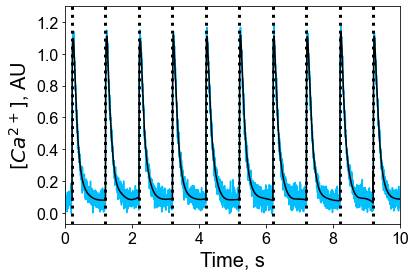

In [6]:
t,ca,_ = analyzer.GetAllExpTransients()
for i in range(len(t)):
    T, ca_fit, _ = analyzer.GetApproxTransient(i,1)
    plt.plot(t[i] * 1e-3,ca[i], color="deepskyblue")
    plt.plot(T * 1e-3,ca_fit, color="black")
for t_null in analyzer.t0s:
    plt.axvline(t_null * 1e-3,linestyle="dotted", linewidth = 3, color = 'black')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0,10)
plt.xlabel('Time, s', fontsize = 20) 
plt.ylabel('$\mathit{[Ca^{2+}]}$, AU', fontsize = 20)

plt.show()

Get the calcium and sarcomere (if provided) traces as pandas DataFrame. This dataframe can be then exported as CSV or Excel file.

In [7]:
traces = analyzer.GetTransientsTable()
traces.to_excel("traces.xlsx")